In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
test_df = pd.read_csv("../data/test_data_options.csv")

target_col = "lastPrice"
ticker_col = "stockTicker"

Y_test = test_df[[target_col]]
X_test = test_df.drop(columns=[target_col, ticker_col]) 

In [4]:
test_df_scaled = pd.read_csv("../data/test_data_options_scaled.csv")

target_col = "lastPrice"
ticker_col = "stockTicker"

Y_test = test_df_scaled[[target_col]]
X_test_scaled = test_df_scaled.drop(columns=[target_col, ticker_col]) 

In [5]:
from tensorflow import keras

model1 = keras.models.load_model("model_scaledfeatures.keras")
model2 = keras.models.load_model("best_model_from_tuner.keras")

AttributeError: module 'ml_dtypes' has no attribute 'float4_e2m1fn'


C:\Users\saiha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [6]:
loss1, mae1 = model1.evaluate(X_test_scaled, Y_test)
print(f"Test MAE of Model1: {mae1:.2f}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 290.4188 - mae: 5.4270
Test MAE of Model1: 4.13


In [7]:
loss2, mae2 = model2.evaluate(X_test, Y_test)
print(f"Test MAE of Model2: {mae2:.2f}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.1134 - mae: 9.1134
Test MAE of Model2: 7.90


In [8]:
Y_pred1 = model1.predict(X_test_scaled)
Y_pred2 = model2.predict(X_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [9]:
from models import BlackScholesModel_vec

stock_price = test_df["stockClosePrice"]
strike_price = test_df["strike"]
riskfree_rate = test_df["riskfree_rate"]
time_to_expiry = test_df["deltaT_years"]
volatility = test_df["impliedVolatility"]
isCall = test_df["isCall"]

test_df["calculated_price_BS"] = None

test_df["calculated_price_BS"] = BlackScholesModel_vec(stock_price,strike_price,riskfree_rate,time_to_expiry,volatility,isCall)

In [10]:
test_df["calculated_price_model1"] = Y_pred1[:,0]
test_df["calculated_price_model2"] = Y_pred2[:,0]

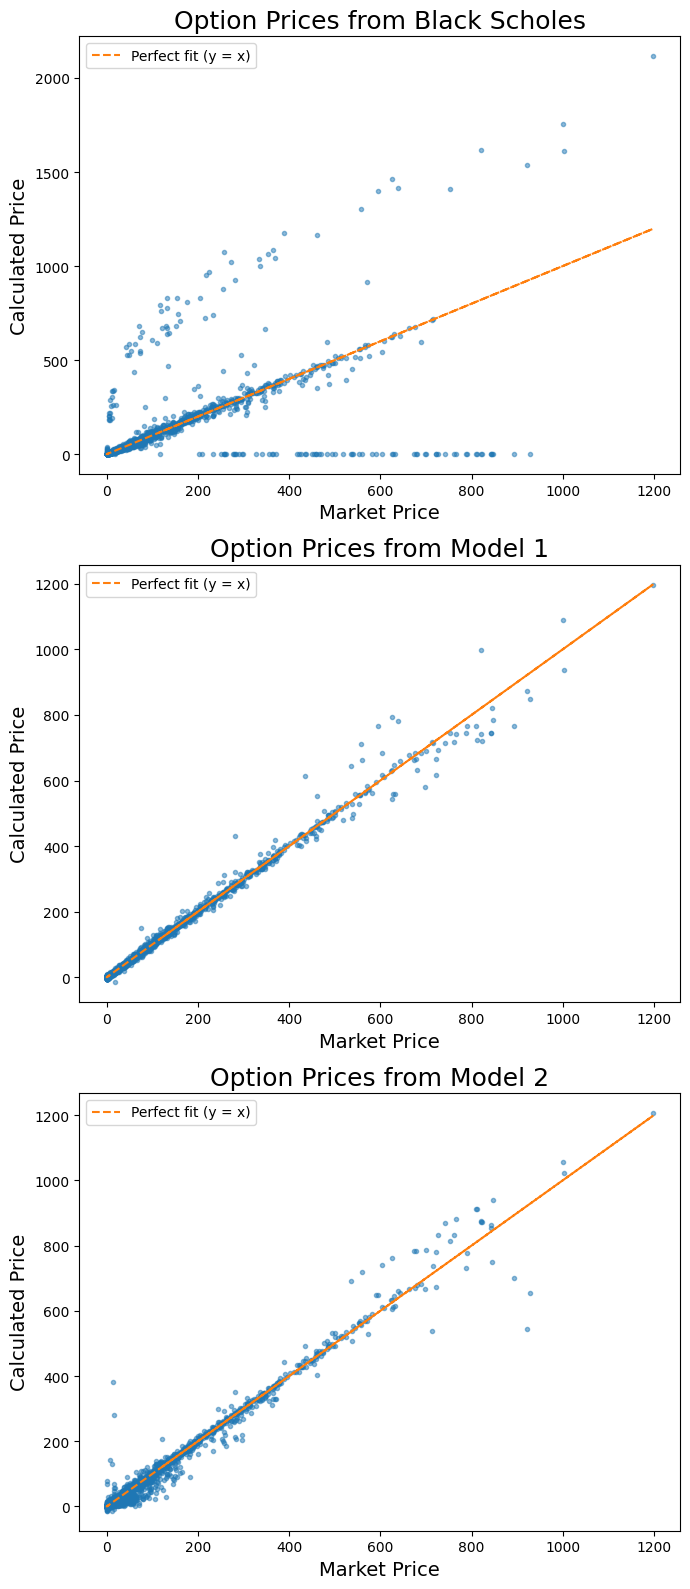

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(7, 16))

ax = axes[0]

ax.plot(test_df["lastPrice"],test_df["calculated_price_BS"],'.',alpha=0.5)
ax.plot(test_df["lastPrice"], test_df["lastPrice"], "--", label="Perfect fit (y = x)")
ax.set_xlabel("Market Price",fontsize=14)
ax.set_ylabel("Calculated Price",fontsize=14)
ax.set_title('Option Prices from Black Scholes',fontsize=18)
ax.legend()

ax = axes[1]

ax.plot(test_df["lastPrice"],test_df["calculated_price_model1"],'.',alpha=0.5)
ax.plot(test_df["lastPrice"], test_df["lastPrice"], "--", label="Perfect fit (y = x)")
ax.set_xlabel("Market Price",fontsize=14)
ax.set_ylabel("Calculated Price",fontsize=14)
ax.set_title('Option Prices from Model 1',fontsize=18)
ax.legend()

ax = axes[2]

ax.plot(test_df["lastPrice"],test_df["calculated_price_model2"],'.',alpha=0.5)
ax.plot(test_df["lastPrice"], test_df["lastPrice"], "--", label="Perfect fit (y = x)")
ax.set_xlabel("Market Price",fontsize=14)
ax.set_ylabel("Calculated Price",fontsize=14)
ax.set_title('Option Prices from Model 2',fontsize=18)
ax.legend()

plt.tight_layout()
plt.savefig("../plots/optionprice_BSvsNNmodels_vertical.png")

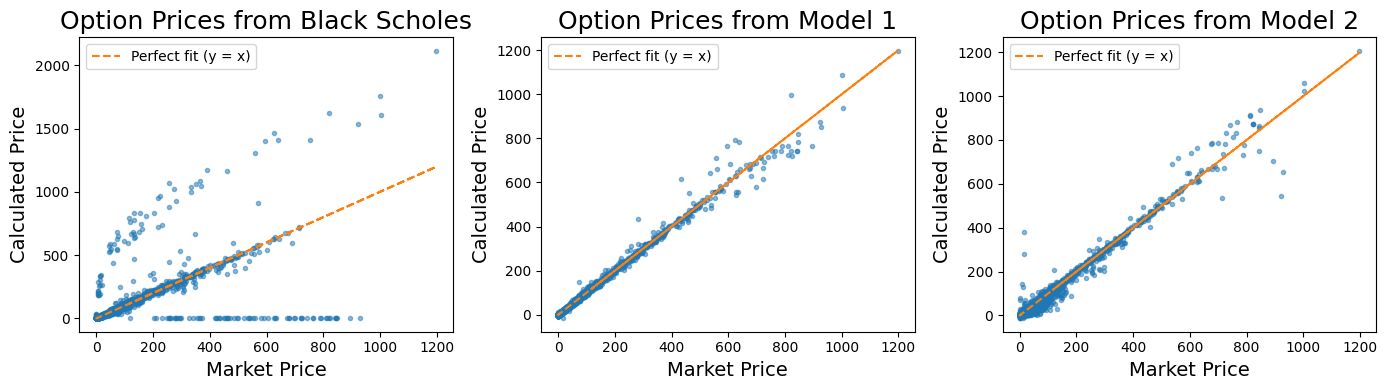

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

ax = axes[0]

ax.plot(test_df["lastPrice"],test_df["calculated_price_BS"],'.',alpha=0.5)
ax.plot(test_df["lastPrice"], test_df["lastPrice"], "--", label="Perfect fit (y = x)")
ax.set_xlabel("Market Price",fontsize=14)
ax.set_ylabel("Calculated Price",fontsize=14)
ax.set_title('Option Prices from Black Scholes',fontsize=18)
ax.legend()

ax = axes[1]

ax.plot(test_df["lastPrice"],test_df["calculated_price_model1"],'.',alpha=0.5)
ax.plot(test_df["lastPrice"], test_df["lastPrice"], "--", label="Perfect fit (y = x)")
ax.set_xlabel("Market Price",fontsize=14)
ax.set_ylabel("Calculated Price",fontsize=14)
ax.set_title('Option Prices from Model 1',fontsize=18)
ax.legend()

ax = axes[2]

ax.plot(test_df["lastPrice"],test_df["calculated_price_model2"],'.',alpha=0.5)
ax.plot(test_df["lastPrice"], test_df["lastPrice"], "--", label="Perfect fit (y = x)")
ax.set_xlabel("Market Price",fontsize=14)
ax.set_ylabel("Calculated Price",fontsize=14)
ax.set_title('Option Prices from Model 2',fontsize=18)
ax.legend()

plt.tight_layout()
plt.savefig("../plots/optionprice_BSvsNNmodels.png")